In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/DS/Ds.zip' -d /content/images

In [ ]:
img_height = 32
img_width = 32
batch_size = 9

data_dir = "/content/images"

In [ ]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5631 files belonging to 4 classes.
Using 4505 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5631 files belonging to 4 classes.
Using 1126 files for validation.


In [ ]:
classes = train_ds.class_names
print(classes)

['cloudy', 'desert', 'green_area', 'water']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(9, 32, 32, 3)
(9,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
import numpy as np

normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.08039216 0.34117648


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

num_classes = len(classes)
model = Sequential()

model.add(layers.InputLayer(shape=(img_height, img_width, 3)))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 155,300 (606.64 KB)

 Trainable params: 155,300 (606.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
num_of_epochs = 3
history = model.fit(train_ds, validation_data=val_ds, epochs=num_of_epochs)

Epoch 1/3
501/501 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.7144 - loss: 0.5320 - val_accuracy: 0.7833 - val_loss: 0.3460
Epoch 2/3
501/501 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8805 - loss: 0.2448 - val_accuracy: 0.9201 - val_loss: 0.1786
Epoch 3/3
501/501 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9097 - loss: 0.1928 - val_accuracy: 0.9343 - val_loss: 0.1462


In [ ]:
from tensorflow.keras import models

# Define the VGG16 model architecture
def vgg16(input_shape=(32, 32, 3), num_classes=4):
    model_vgg = models.Sequential()

    model_vgg.add(layers.InputLayer(shape=(img_height, img_width, 3)))
    # Block 1: Convolutional layers
    model_vgg.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model_vgg.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model_vgg.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))  # Max pooling layer

    # Block 2: Convolutional layers
    model_vgg.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model_vgg.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model_vgg.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))  # Max pooling layer

    # Block 3: Convolutional layers
    model_vgg.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model_vgg.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model_vgg.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model_vgg.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))  # Max pooling layer

    # Block 4: Convolutional layers
    model_vgg.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model_vgg.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model_vgg.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model_vgg.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))  # Max pooling layer

    # Block 5: Convolutional layers
    model_vgg.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model_vgg.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model_vgg.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model_vgg.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))  # Max pooling layer

    # Fully connected layers
    model_vgg.add(layers.Flatten())  # Flatten the 3D output to 1D
    model_vgg.add(layers.Dense(4096, activation='relu'))  # First fully connected layer
    model_vgg.add(layers.Dense(4096, activation='relu'))  # Second fully connected layer
    model_vgg.add(layers.Dense(num_classes, activation='softmax'))  # Output layer

    return model_vgg

# Instantiate the VGG16 model
vgg16_model = vgg16(input_shape=(img_height, img_width, 3), num_classes=4)

# Print the model summary to check the architecture
vgg16_model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_113 (Conv2D)                  │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_114 (Conv2D)                  │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_115 (Conv2D)                  │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_116 (Conv2D)                  │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_117 (Conv2D)                  │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_118 (Conv2D)                  │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_119 (Conv2D)                  │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_120 (Conv2D)                  │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_121 (Conv2D)                  │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_122 (Conv2D)                  │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_123 (Conv2D)                  │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_124 (Conv2D)                  │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_125 (Conv2D)                  │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4096)                │       2,101,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 33,613,636 (128.23 MB)

 Trainable params: 33,613,636 (128.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
vgg16_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
vgg16_history = vgg16_model.fit(train_ds, validation_data=val_ds,epochs=num_of_epochs)

Epoch 1/3
501/501 ━━━━━━━━━━━━━━━━━━━━ 742s 1s/step - accuracy: 0.4917 - loss: 6.5110 - val_accuracy: 0.5462 - val_loss: 0.9073
Epoch 2/3
501/501 ━━━━━━━━━━━━━━━━━━━━ 735s 1s/step - accuracy: 0.6742 - loss: 0.5271 - val_accuracy: 0.8401 - val_loss: 0.3836
Epoch 3/3
501/501 ━━━━━━━━━━━━━━━━━━━━ 740s 1s/step - accuracy: 0.7576 - loss: 0.6206 - val_accuracy: 0.7211 - val_loss: 0.3697


In [ ]:
# Load the InceptionV3 model as base
base = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(75, 75, 3))
base.trainable = False

# Initialize the Sequential model
v3_model = tf.keras.models.Sequential()

# Add the base model (InceptionV3) as the first layer
v3_model.add(base)

# Add GlobalAveragePooling2D layer
v3_model.add(layers.GlobalAveragePooling2D())

# Add a Dense layer with 1024 units and ReLU activation
v3_model.add(layers.Dense(1024, activation='relu'))

# Add a Dense layer for the output with 4 classes and softmax activation
v3_model.add(layers.Dense(4, activation='softmax'))

# Print model summary
v3_model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 1, 1, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,905,060 (91.19 MB)

 Trainable params: 2,102,276 (8.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
v3_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

train_ds_v3 = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(75, 75),
  batch_size=batch_size)

val_ds_v3 = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(75, 75),
  batch_size=batch_size)

Found 5631 files belonging to 4 classes.
Using 4505 files for training.
Found 5631 files belonging to 4 classes.
Using 1126 files for validation.


In [ ]:
v3_model_history = v3_model.fit(train_ds_v3, validation_data=val_ds_v3, epochs=1)

501/501 ━━━━━━━━━━━━━━━━━━━━ 95s 173ms/step - accuracy: 0.8383 - loss: 11.5723 - val_accuracy: 0.9565 - val_loss: 0.7595


In [ ]:
# Load the MobileNetV2 model as base
base_mbl = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(75, 75, 3))
base_mbl.trainable = False

# Initialize the Sequential model
mobilenet_model = tf.keras.models.Sequential()

# Add the base model (MobileNetV2) as the first layer
mobilenet_model.add(base_mbl)

# Add GlobalAveragePooling2D layer
mobilenet_model.add(layers.GlobalAveragePooling2D())

# Add a Dense layer with 1024 units and ReLU activation
mobilenet_model.add(layers.Dense(1024, activation='relu'))

# Add a Dense layer for the output with 4 classes and softmax activation
mobilenet_model.add(layers.Dense(4, activation='softmax'))

In [ ]:
mobilenet_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 3, 3, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,573,828 (13.63 MB)

 Trainable params: 1,315,844 (5.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
mobilenet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
mobilenet_model_history = mobilenet_model.fit(train_ds_v3, validation_data=val_ds_v3, epochs=num_of_epochs)

Epoch 1/3
501/501 ━━━━━━━━━━━━━━━━━━━━ 52s 92ms/step - accuracy: 0.8835 - loss: 0.7298 - val_accuracy: 0.9716 - val_loss: 0.0836
Epoch 2/3
501/501 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 0.9820 - loss: 0.0544 - val_accuracy: 0.9831 - val_loss: 0.0611
Epoch 3/3
501/501 ━━━━━━━━━━━━━━━━━━━━ 85s 96ms/step - accuracy: 0.9848 - loss: 0.0402 - val_accuracy: 0.9805 - val_loss: 0.0710


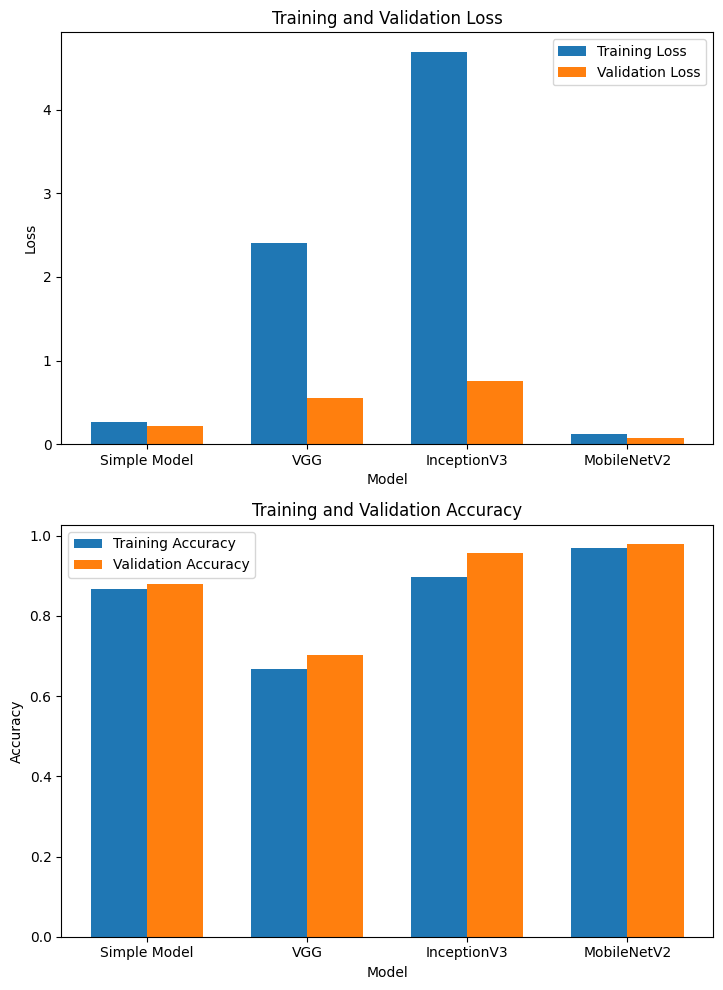

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract training and validation loss/accuracy for each model
train_loss_simple = history.history['loss']
val_loss_simple = history.history['val_loss']
train_accuracy_simple = history.history['accuracy']
val_accuracy_simple = history.history['val_accuracy']

train_loss_vgg = vgg16_history.history['loss']
val_loss_vgg = vgg16_history.history['val_loss']
train_accuracy_vgg = vgg16_history.history['accuracy']
val_accuracy_vgg = vgg16_history.history['val_accuracy']

train_loss_inceptionv3 = v3_model_history.history['loss']
val_loss_inceptionv3 = v3_model_history.history['val_loss']
train_accuracy_inceptionv3 = v3_model_history.history['accuracy']
val_accuracy_inceptionv3 = v3_model_history.history['val_accuracy']

train_loss_mobilenet = mobilenet_model_history.history['loss']
val_loss_mobilenet = mobilenet_model_history.history['val_loss']
train_accuracy_mobilenet = mobilenet_model_history.history['accuracy']
val_accuracy_mobilenet = mobilenet_model_history.history['val_accuracy']

# Define the models for the x-axis labels
models = ['Simple Model', 'VGG', 'InceptionV3', 'MobileNetV2']

# Set the number of epochs (assuming all models have the same number of epochs)
epochs = range(1, len(train_loss_simple) + 1)

# Calculate the average loss and accuracy over all epochs for each model
avg_train_loss = [np.mean(train_loss_simple), np.mean(train_loss_vgg), np.mean(train_loss_inceptionv3), np.mean(train_loss_mobilenet)]
avg_val_loss = [np.mean(val_loss_simple), np.mean(val_loss_vgg), np.mean(val_loss_inceptionv3), np.mean(val_loss_mobilenet)]
avg_train_accuracy = [np.mean(train_accuracy_simple), np.mean(train_accuracy_vgg), np.mean(train_accuracy_inceptionv3), np.mean(train_accuracy_mobilenet)]
avg_val_accuracy = [np.mean(val_accuracy_simple), np.mean(val_accuracy_vgg), np.mean(val_accuracy_inceptionv3), np.mean(val_accuracy_mobilenet)]

# Plotting
plt.figure(figsize=(14, 10))

# Plot Training Loss for all models as bar chart
plt.subplot(2, 2, 1)
bar_width = 0.35  # Bar width
x_pos = np.arange(len(models))  # Position of bars on x-axis

plt.bar(x_pos - bar_width/2, avg_train_loss, bar_width, label='Training Loss')
plt.bar(x_pos + bar_width/2, avg_val_loss, bar_width, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.xticks(x_pos, models)  # Set the x-axis labels as model names
plt.legend()

# Plot Training Accuracy for all models as bar chart
plt.subplot(2, 2, 3)
plt.bar(x_pos - bar_width/2, avg_train_accuracy, bar_width, label='Training Accuracy')
plt.bar(x_pos + bar_width/2, avg_val_accuracy, bar_width, label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(x_pos, models)  # Set the x-axis labels as model names
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
